![](61qj8vvbawh6gnc8.webp)

## DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

## Dataset Description
  
  This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

## Holiday Events

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


## Importing Data

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline

C:\Users\karti\AppData\Local\Temp\ipykernel_22996\3332932693.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
mart_data = pd.read_csv(r"C:\Users\karti\OneDrive\Desktop\Kartike\Projects\EDA_Projects\WALMART_SALES_DATA.csv")

## Examining Data

In [4]:
mart_data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [5]:
mart_data.shape

(6435, 8)

In [6]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
mart_data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [8]:
mart_data.describe(include= 'all')

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782   
std       12.988182         NaN  5.643666e+05      0.255049    18.444933   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000         NaN  5.533501e+05      0.000000    47.460000   
50%       23.000000         NaN  9.607460e+05      0.000000    62.670000   
75%       34.000000         NaN  1.420159e+06      0.000000    74.940000   
max       45.000000         NaN  3.818686e+06      1.000000   100.140000   

         Fuel_Price          CPI  Unemployment  
count   6435.000000  6435.000000   6435.000000  
unique          NaN          NaN           NaN  
top             NaN          NaN           NaN  
freq            NaN          NaN           NaN  
mean       3.358607   171.578394      7.999151  
std        0.459020    39.356712      1.875885  
min        2.472000   126.064000      3.879000  
25%        2.933000   131.735000      6.891000  
50%        3.445000   182.616521      7.874000  
75%        3.735000   212.743293      8.622000  
max        4.468000   227.232807     14.313000

In [9]:
mart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
mart_data.isnull().values.any()

False

In [11]:
mart_data.count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

In [12]:
mart_data.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [13]:
#Converting Date column data type into date type

mart_data['Date'] = pd.to_datetime(mart_data['Date'])

C:\Users\karti\AppData\Local\Temp\ipykernel_22996\1303081697.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mart_data['Date'] = pd.to_datetime(mart_data['Date'])


In [14]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


**Insights**
- There are 6435 rows and 8 columns
- No null values found
- No dupicate rows found

## Data Profiling

In [15]:
profile_mart = pandas_profiling.ProfileReport(mart_data)

In [16]:
profile_mart

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
profile_mart.to_file(output_file="Walmart_profile_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##  Analysis Tasks

### 1. Which store has maximum sales?

In [18]:
mart_data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [19]:
mart_data['Weekly_Sales'].max()

3818686.45

In [20]:
mart_data.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending= False)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

**Insights**
- Store 20 has the maximum sales of 3818686.45

### 2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [21]:
stdmart = pd.DataFrame(mart_data.groupby(['Store'])['Weekly_Sales'].std())

In [22]:
stdmart['Weekly_Sales'].sort_values(ascending= False).head(3)

Store
14    317569.949476
10    302262.062504
20    275900.562742
Name: Weekly_Sales, dtype: float64

In [23]:
stdmart['CoV'] =pd.DataFrame((stdmart['Weekly_Sales']/stdmart['Weekly_Sales'].mean())*100) 

In [24]:
stdmart

Weekly_Sales         CoV
Store                           
1      155980.767761  110.166907
2      237683.694682  167.872475
3       46319.631557   32.714870
4      266201.442297  188.014138
5       37737.965745   26.653766
6      212525.855862  150.103866
7      112585.469220   79.517450
8      106280.829881   75.064577
9       69028.666585   48.753925
10     302262.062504  213.483220
11     165833.887863  117.126020
12     139166.871880   98.291501
13     265506.995776  187.523660
14     317569.949476  224.294954
15     120538.652043   85.134665
16      85769.680133   60.577855
17     112162.936087   79.219021
18     176641.510839  124.759284
19     191722.638730  135.410861
20     275900.562742  194.864483
21     128752.812853   90.936206
22     161251.350631  113.889442
23     249788.038068  176.421593
24     167745.677567  118.476289
25     112976.788600   79.793833
26     110431.288141   77.995984
27     239930.135688  169.459103
28     181758.967539  128.373668
29      99120.136596   70.007085
30      22809.665590   16.110129
31     125855.942933   88.890189
32     138017.252087   97.479542
33      24132.927322   17.044729
34     104630.164676   73.898736
35     211243.457791  149.198127
36      60725.173579   42.889291
37      21837.461190   15.423476
38      42768.169450   30.206525
39     217466.454833  153.593337
40     119002.112858   84.049430
41     187907.162766  132.716047
42      50262.925530   35.499960
43      40598.413260   28.674058
44      24762.832015   17.489622
45     130168.526635   91.936103

In [25]:
stdmart['CoV'].sort_values(ascending= False).head(3)

Store
14    224.294954
10    213.483220
20    194.864483
Name: CoV, dtype: float64

**Insights**

- Store ***14*** has the maximum Standard Deviation of ***317569.9***
- Coefficient of variation of store 14 is 224.2

### 3. Which store/s has good quarterly growth rate in Q3’2012
- **July, August, and September (Q3)**

In [26]:
date_Q3 = mart_data[(mart_data['Date'] >= '2012-07-01') & (mart_data['Date'] <= '2012-09-30')]

In [27]:
Growth_rate_Q3 = date_Q3.groupby(['Store'])['Weekly_Sales'].sum()


In [28]:
Growth_rate_Q3.sort_values(ascending= False)

Store
4     25652119.35
20    24665938.11
13    24319994.35
2     22396867.61
10    21169356.45
27    20191238.11
14    20140430.40
39    18899955.17
1     18633209.98
6     18341221.11
23    17103654.36
19    16644341.31
31    16454328.46
41    16373588.44
24    16125999.86
11    16094363.07
28    15055659.67
32    14142164.84
18    12507521.72
26    12417575.35
22    11818544.33
12    11777508.50
40    11647661.37
17    11533998.38
34    11476258.98
8     10873860.34
35    10252122.68
45     8851242.32
21     8403507.99
25     8309440.44
43     7376726.03
7      7322393.92
15     6909374.37
42     6830839.86
9      6528239.56
16     6441311.11
37     6250524.08
29     6127862.07
30     5181974.44
38     5129297.64
3      4966495.93
44     4020486.01
5      3880621.88
36     3578123.58
33     3177072.43
Name: Weekly_Sales, dtype: float64

**Insights**

- Store  ***4***  has best growth rate in Q3 of 2012 with ***25652119.35***

### 4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [29]:
mart_data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [30]:
holiday_sales = mart_data[mart_data['Holiday_Flag'] != 0]
    

In [31]:
holiday_sales.shape

(450, 8)

In [32]:
non_holiday_sales = mart_data[mart_data['Holiday_Flag'] != 1]

In [33]:
non_holiday_sales.shape


(5985, 8)

In [34]:
non_holiday_sales['Weekly_Sales'].mean()

1041256.3802088555

In [35]:
holiday_sales['Weekly_Sales'].mean()

1122887.8923555557

In [36]:
mart_data['Date'] = pd.DatetimeIndex(mart_data['Date'])

Text(0.5, 1.0, 'Super Bowl Sales')

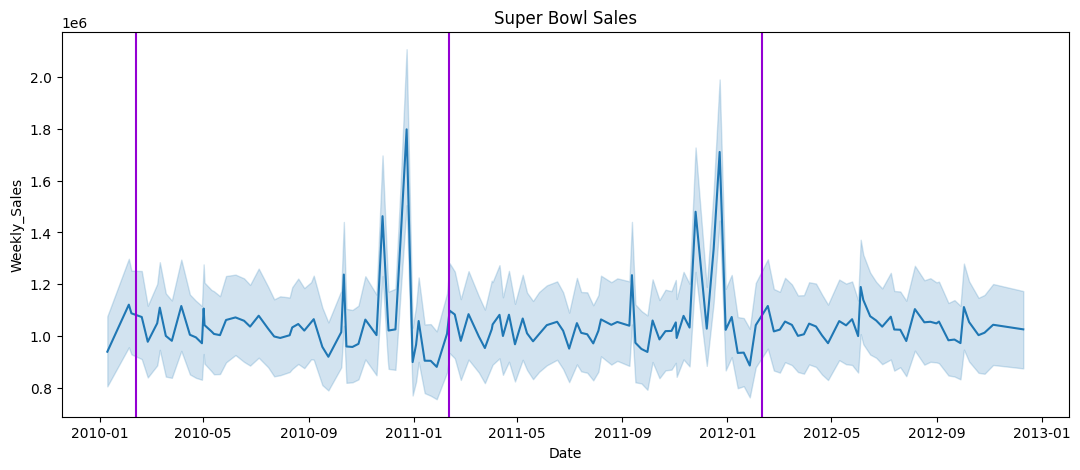

In [37]:
#Super_Bowl = '2010-02-12','2011-02-11','2012-02-10' == Holidays for super bowl
plt.figure(figsize=(13,5))
sns.lineplot(data= mart_data, x= 'Date', y= 'Weekly_Sales')
plt.axvline(pd.to_datetime('2010-02-12'),color= 'darkviolet')
plt.axvline(pd.to_datetime('2011-02-11'),color= 'darkviolet')
plt.axvline(pd.to_datetime('2012-02-10'),color= 'darkviolet')
plt.title('Super Bowl Sales')


Text(0.5, 1.0, 'Labour Day Sales')

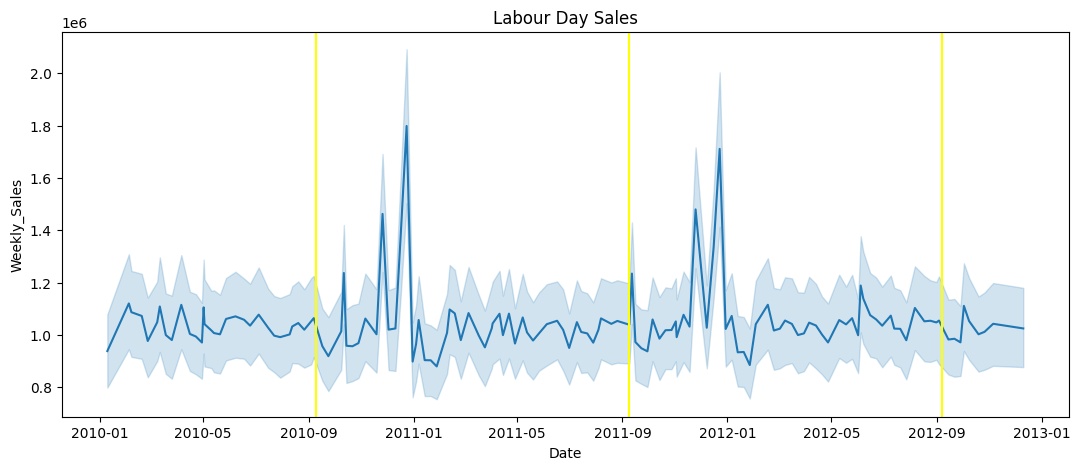

In [38]:
#Labour Day = '2010-09-10', '2011-09-09', '2012-09-07' == Holidays for Labour Day
plt.figure(figsize=(13,5))
sns.lineplot(data= mart_data, x= 'Date', y= 'Weekly_Sales')
plt.axvline(pd.to_datetime('2010-09-10'),color= 'yellow')
plt.axvline(pd.to_datetime('2011-09-09'),color= 'yellow')
plt.axvline(pd.to_datetime('2012-09-07'),color= 'yellow')
plt.title('Labour Day Sales')

Text(0.5, 1.0, 'Thanksgiving Sales')

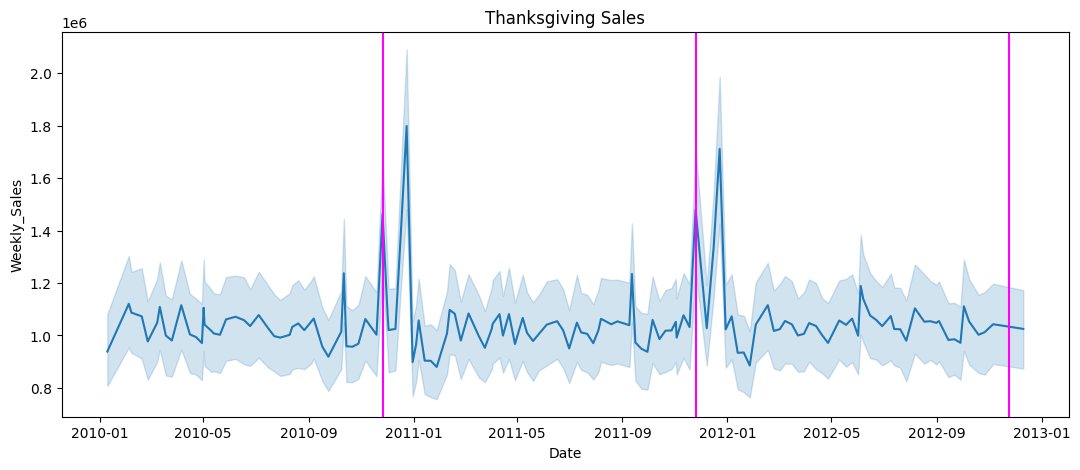

In [39]:
#Thanksgiving = '2010-11-26', '2011-11-25', '2012-11-23' == Holidays for Thanksgiving
plt.figure(figsize=(13,5))
sns.lineplot(data= mart_data, x= 'Date', y= 'Weekly_Sales')
plt.axvline(pd.to_datetime('2010-11-26'),color= 'magenta')
plt.axvline(pd.to_datetime('2011-11-25'),color= 'magenta')
plt.axvline(pd.to_datetime('2012-11-23'),color= 'magenta')
plt.title('Thanksgiving Sales')

Text(0.5, 1.0, 'Chrismas Day Sales')

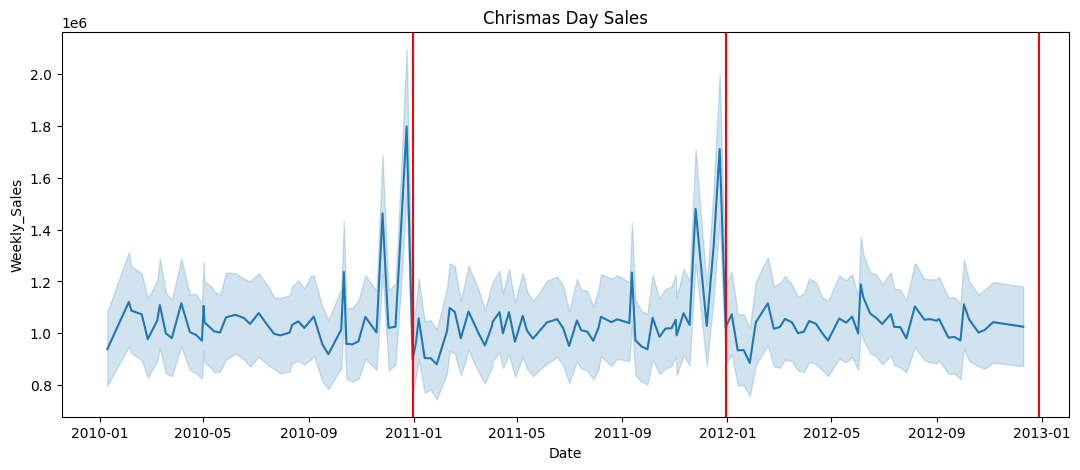

In [40]:
#Chrismas = '31-12-2010', '30-12-2011', '28-12-2012' == Holidays for Chrismas
plt.figure(figsize=(13,5))
sns.lineplot(data= mart_data, x= 'Date', y= 'Weekly_Sales')
plt.axvline(pd.to_datetime('2010-12-31'),color= 'red')
plt.axvline(pd.to_datetime('2011-12-30'),color= 'red')
plt.axvline(pd.to_datetime('2012-12-28'),color= 'red')
plt.title('Chrismas Day Sales')

**Insights**

- Highest Sales is on Thanksgiving 
- No holiday has a neative impact on sales
- In holidays, sales are higher as compaired to non-holidays

### 5. Provide a monthly and semester view of sales in units and give insights

In [41]:
mart_data = mart_data.set_index('Date')


In [42]:
mart_data.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106

In [43]:
 year_2010 = mart_data['2010']

C:\Users\karti\AppData\Local\Temp\ipykernel_22996\4054922395.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  year_2010 = mart_data['2010']


In [44]:
year_2010.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106

In [45]:
year_2010.shape

(2160, 7)

In [46]:
year_2011 = mart_data['2011']

C:\Users\karti\AppData\Local\Temp\ipykernel_22996\787226053.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  year_2011 = mart_data['2011']


In [47]:
year_2012 = mart_data['2012']

C:\Users\karti\AppData\Local\Temp\ipykernel_22996\1464521001.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  year_2012 = mart_data['2012']


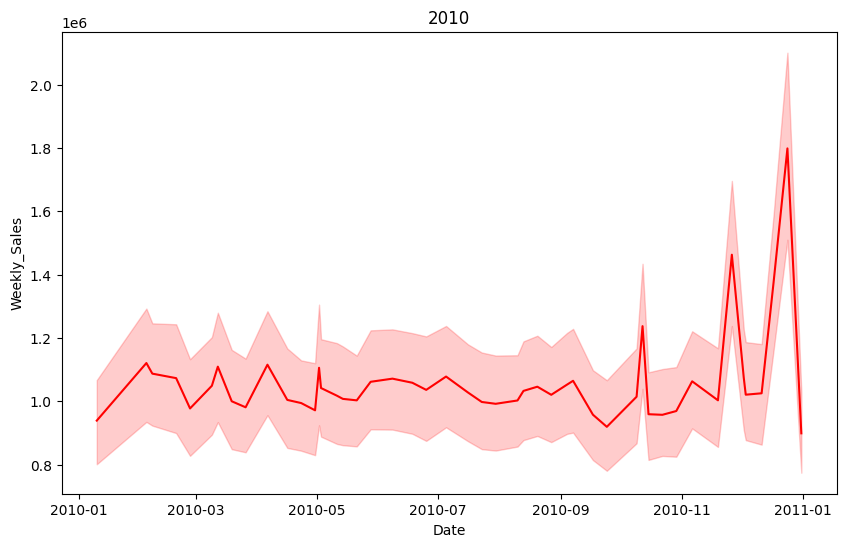

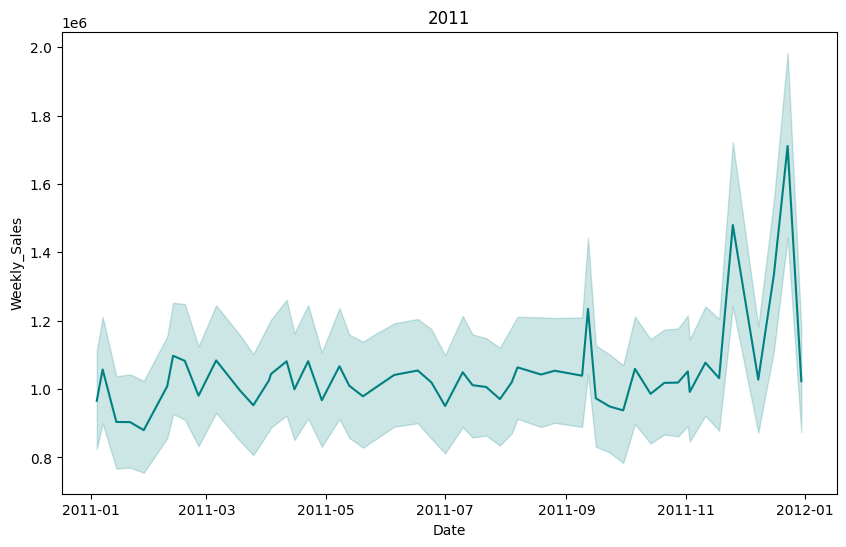

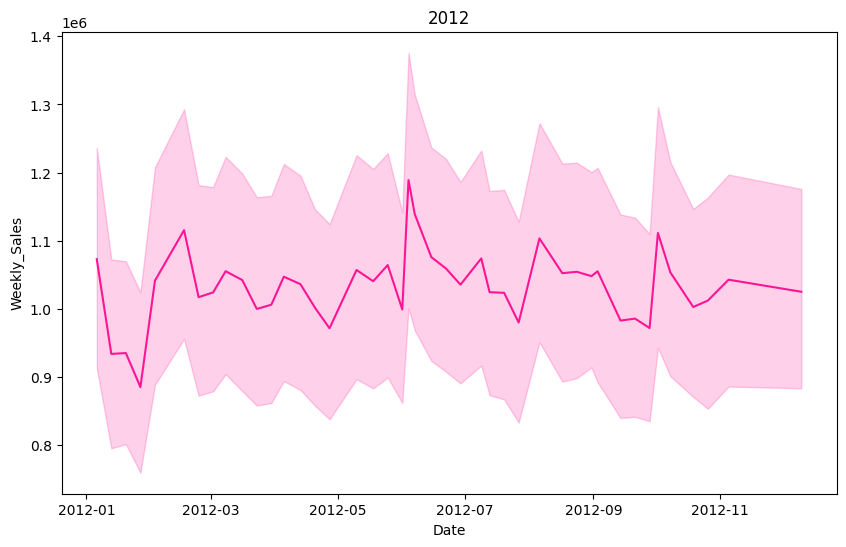

In [48]:
plt.figure(figsize= (10,6))
sns.lineplot(x= 'Date',y= 'Weekly_Sales',data= year_2010,color= 'red')
plt.title('2010')
plt.show()

plt.figure(figsize= (10,6))
sns.lineplot(x= 'Date',y= 'Weekly_Sales',data= year_2011,color= 'teal')
plt.title('2011')
plt.show()


plt.figure(figsize= (10,6))
sns.lineplot(x= 'Date',y= 'Weekly_Sales',data= year_2012,color= 'deeppink')
plt.title('2012')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array([<AxesSubplot: xlabel='Date', ylabel='Weekly_Sales'>], dtype=object)

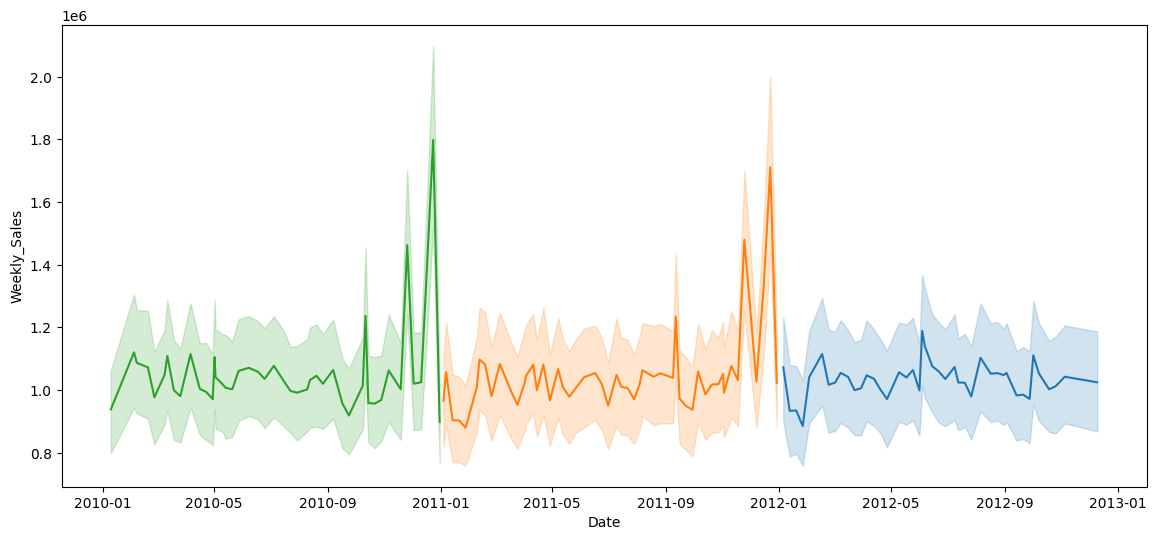

In [49]:
plt.figure(figsize=(14,6))
plt.plot(sns.lineplot(x= 'Date',y= 'Weekly_Sales',data= year_2012),sns.lineplot(x= 'Date',y= 'Weekly_Sales',data= year_2011),sns.lineplot(x= 'Date',y= 'Weekly_Sales',data= year_2010))



In [56]:
mart_data.reset_index(inplace= True)

In [57]:
mart_data['Year'] = mart_data['Date'].dt.year

In [58]:
mart_data.head()

Date  Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0 2010-05-02      1    1643690.90             0        42.31       2.572   
1 2010-12-02      1    1641957.44             1        38.51       2.548   
2 2010-02-19      1    1611968.17             0        39.93       2.514   
3 2010-02-26      1    1409727.59             0        46.63       2.561   
4 2010-05-03      1    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  
0  211.096358         8.106  2010  
1  211.242170         8.106  2010  
2  211.289143         8.106  2010  
3  211.319643         8.106  2010  
4  211.350143         8.106  2010

Text(0.5, 1.0, 'Year wise Sales')

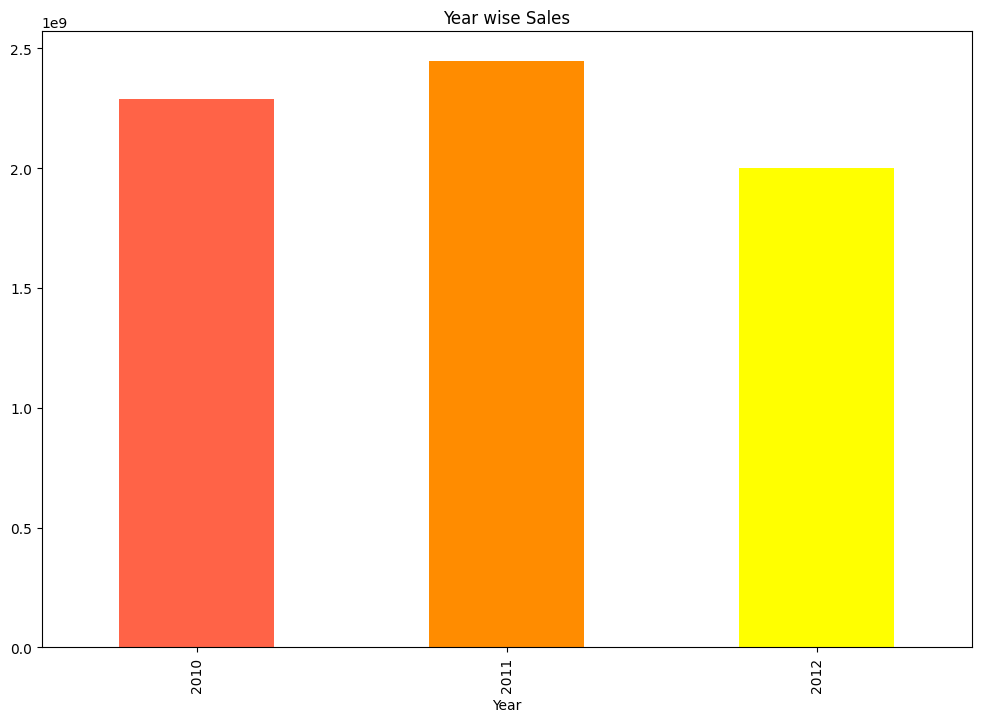

In [68]:
plt.figure(figsize=(12,8))
mart_data.groupby(['Year'])['Weekly_Sales'].sum().plot(kind= 'bar',color= ['tomato',  'darkorange','yellow'])
plt.title('Year wise Sales')

**Insights**
- End year months have high sales
- End of Q2 period  has low sales
- **2011** year has ***highest*** sale 
- Sales in **2012** is ***lowest***